# KMeans Clustering Exercise

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
#import dataset
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [35]:
#iris.target

In [15]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
#add the target_names column
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df = df.rename(columns = {'petal length (cm)': 'plength(cm)', 'petal width (cm)' : 'pwidth(cm)'})
df.head()

,sepal length (cm),sepal width (cm),plength(cm),pwidth(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df.shape

(150, 5)

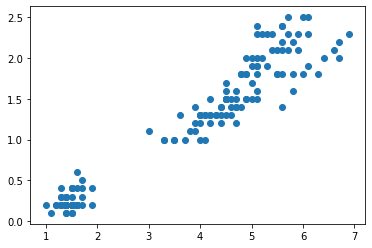

In [24]:
#plot the scatter plot
plt.scatter(df['plength(cm)'], df['pwidth(cm)'])

In [25]:
#import the kmeans library
from sklearn.cluster import KMeans

In [36]:
#instantiate the kmeans class
km = KMeans(n_clusters = 3)

In [37]:
#train and make prediction
y_pred = km.fit_predict(df[['plength(cm)', 'pwidth(cm)']])
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
df['cluster'] = y_pred
df.head(10)

,sepal length (cm),sepal width (cm),plength(cm),pwidth(cm),species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
5,5.4,3.9,1.7,0.4,setosa,2
6,4.6,3.4,1.4,0.3,setosa,2
7,5.0,3.4,1.5,0.2,setosa,2
8,4.4,2.9,1.4,0.2,setosa,2
9,4.9,3.1,1.5,0.1,setosa,2


<function matplotlib.pyplot.legend(*args, **kwargs)>

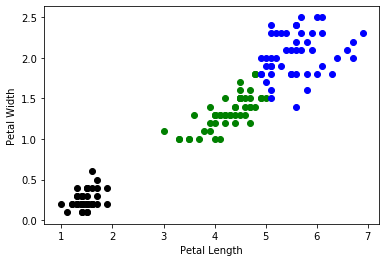

In [44]:
#identify the each cluster
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['plength(cm)'], df1['pwidth(cm)'], color='green', label='group0')
plt.scatter(df2['plength(cm)'], df2['pwidth(cm)'], color='blue', label='group1')
plt.scatter(df3['plength(cm)'], df3['pwidth(cm)'], color='black', label='group2')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend

In [46]:
# for balanced scaling, MinMaxScaler will be used
from sklearn.preprocessing import MinMaxScaler

In [54]:
#create an object of the class
scaler = MinMaxScaler()

#for length
scaler.fit(df[['plength(cm)']])
df['plength(cm)'] = scaler.transform(df[['plength(cm)']])

#for width
scaler.fit(df[['pwidth(cm)']])
df['pwidth(cm)'] = scaler.transform(df[['pwidth(cm)']])
df.head()

,sepal length (cm),sepal width (cm),plength(cm),pwidth(cm),species,cluster
0,5.1,3.5,0.067797,0.041667,setosa,2
1,4.9,3.0,0.067797,0.041667,setosa,2
2,4.7,3.2,0.050847,0.041667,setosa,2
3,4.6,3.1,0.084746,0.041667,setosa,2
4,5.0,3.6,0.067797,0.041667,setosa,2


In [62]:
#invoke the KMeans class again
km = KMeans(n_clusters=3)
y_pred2 = km.fit_predict(df[['plength(cm)','pwidth(cm)']])
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
df['cluster2'] = y_pred

In [64]:
df.head()

,sepal length (cm),sepal width (cm),plength(cm),pwidth(cm),species,cluster,cluster2
0,5.1,3.5,0.067797,0.041667,setosa,2,0
1,4.9,3.0,0.067797,0.041667,setosa,2,0
2,4.7,3.2,0.050847,0.041667,setosa,2,0
3,4.6,3.1,0.084746,0.041667,setosa,2,0
4,5.0,3.6,0.067797,0.041667,setosa,2,0


<function matplotlib.pyplot.legend(*args, **kwargs)>

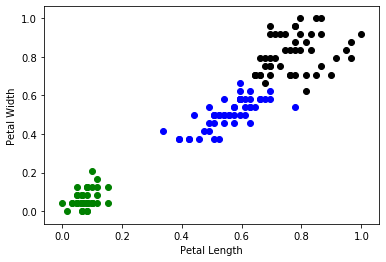

In [65]:
#identify the each cluster
df1 = df[df['cluster2'] == 0]
df2 = df[df['cluster2'] == 1]
df3 = df[df['cluster2'] == 2]

plt.scatter(df1['plength(cm)'], df1['pwidth(cm)'], color='green', label='group0')
plt.scatter(df2['plength(cm)'], df2['pwidth(cm)'], color='blue', label='group1')
plt.scatter(df3['plength(cm)'], df3['pwidth(cm)'], color='black', label='group2')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend

Result is almost similar to the first one

In [68]:
#find the centroids
centroids = km.cluster_centers_
centroids

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

<function matplotlib.pyplot.legend(*args, **kwargs)>

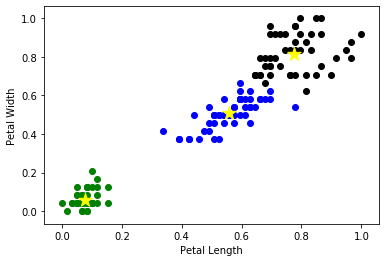

In [73]:
#plot the centroids with on the graph
df1 = df[df['cluster2'] == 0]
df2 = df[df['cluster2'] == 1]
df3 = df[df['cluster2'] == 2]

plt.scatter(df1['plength(cm)'], df1['pwidth(cm)'], color='green', label='group0')
plt.scatter(df2['plength(cm)'], df2['pwidth(cm)'], color='blue', label='group1')
plt.scatter(df3['plength(cm)'], df3['pwidth(cm)'], color='black', label='group2')

plt.scatter(centroids[:,0],centroids[:,1], color='yellow', marker='*' , s=200, label= 'Centroids')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend

In [75]:
#check if the k is accurate
k_grp = np.arange(1,10)
sse = []
for k in k_grp:
    km = KMeans(n_clusters = k)
    km.fit_predict(df[['plength(cm)','pwidth(cm)']])
    sse.append(km.inertia_)
    
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1615234094205578,
 0.853861735391224,
 0.6800800986587507,
 0.5668678306387651,
 0.486178934934251,
 0.4144569278863033]

Text(0.5, 1.0, 'Predictin the right k value')

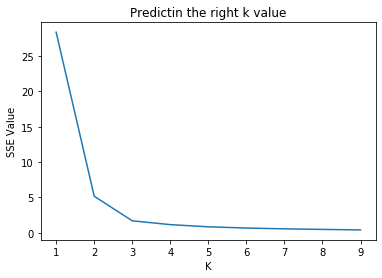

In [76]:
plt.plot(k_grp, sse )
plt.xlabel('K')
plt.ylabel('SSE Value')
plt.title('Predictin the right k value')